## **Objective: SVM Classifier on Digits Dataset**
The Digits dataset contains images of handwritten digits (0-9) represented as 8x8 pixel images. Your task is to train an SVM classifier on this dataset using scikit-learn, evaluate its performance, and optimize its hyperparameters.

### **1. Load the Digits dataset from sklearn.datasets.load_digits.**

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


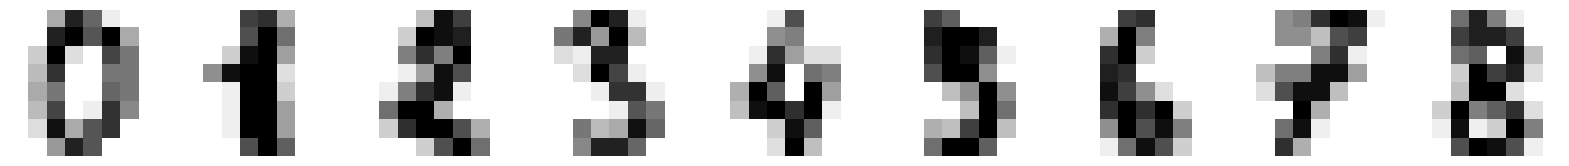

In [2]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 3))
for ax, image in zip(axes, digits.images[:10]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### **2. Split the dataset into 80% training and 20% test data.**

In [ ]:
from sklearn.model_selection import train_test_split

# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42, shuffle=False
)

### **3. Train an SVM classifier using an RBF kernel with default hyperparameters.**
### **4. Compute and print the accuracy on the test data.**

Accuracy score SVC(): 94.17



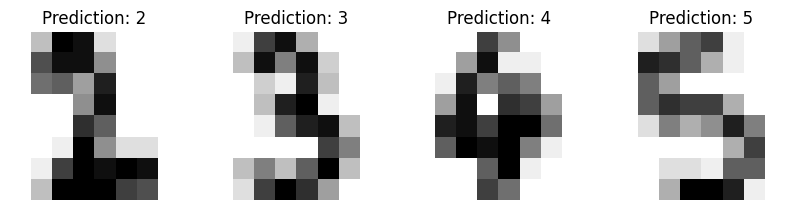

In [4]:
from sklearn import svm, metrics

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
clf_acc_score = metrics.accuracy_score(y_test, predicted)*100
print(f"Accuracy score {clf}: {clf_acc_score:.4}\n")

# Visualize some predictions (optional)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
plt.show()

### **5. Optimize the hyperparameters C and gamma using GridSearchCV with values: C: [0.1, 1, 10, 100] gamma: [0.001, 0.01, 0.1, 1]**
### **6. Print the best C and gamma values.**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 0.001}


### **7. Train a new SVM model with the optimal hyperparameters and report its accuracy.**

Accuracy score SVC(C=10, gamma=0.001): 96.3889



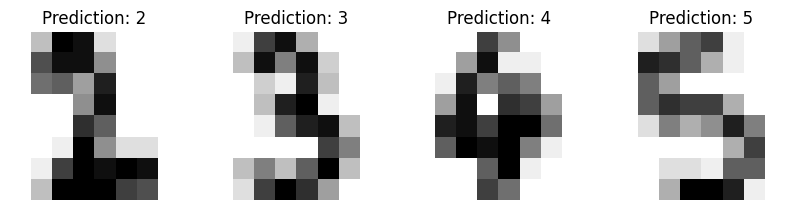

In [6]:
best_svm = svm.SVC(kernel='rbf', C=10, gamma=0.001)
best_svm.fit(X_train, y_train)
best_svm_predicted = best_svm.predict(X_test)
best_svm_acc_score = metrics.accuracy_score(y_test, best_svm_predicted)*100
print(f"Accuracy score {best_svm}: {best_svm_acc_score:.4f}\n")

# Visualize some predictions (optional)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, best_svm_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
plt.show()

In [7]:
print(f"Accuracy of Initial SVM model (wit default hyperparameters): {clf_acc_score:.4f}")
print(f"Optimized Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy of Initial SVM model (wit optimized hyperparameters): {best_svm_acc_score:.4f}")

Accuracy of Initial SVM model (wit default hyperparameters): 94.1667
Optimized Hyperparameters: {'C': 10, 'gamma': 0.001}
Accuracy of Initial SVM model (wit optimized hyperparameters): 96.3889


### SUMMARY:
1. First the dataset was trained on default parameters of Support Vector Classifier and achieved an accuracy of 94.16%
2. Using Cross-validation we found the best values of hyperparameters of C and gamma from the set of values we gave.
3. This best C and gamma is used to retrain the classifier with the same dataset with the same split (meaning, with all other configuration set same as initial one).
4. This best C and gamma lead to increase in accuracy by 2.22%.
5. So finding the optimal values is necessary to get a best model that generalizes well with training and testing error and also classify new data points well.